In [1]:
from IVClassification import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
ref_coef = np.zeros(100)
lg_coef = np.zeros(100)
tslg_coef = np.zeros(100)
thslg_coef = np.zeros(100)
gmm_coef = np.zeros(100)
res_coef = np.zeros(100)

# Determining the Range of Parameters

In [99]:
from sklearn.preprocessing import StandardScaler

np.random.seed(123)

k = np.linspace(-1, 9, 100)
para_range = np.power(10, k)
beta = 1


for i in range(100):
    gamma = para_range[i]
    
    data = sim_data(10000, gamma = gamma, sigma_e=0.1)
    
    
    complete_lg = LogisticRegression()
    X = (data.X - np.mean(data.X)) / np.std(data.X)
    U = (data.U - np.mean(data.U)) / np.std(data.U)
    # complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    complete_data = np.concatenate((X.reshape(-1, 1), U.reshape(-1, 1)), axis=1)
    
    complete_lg.fit(complete_data, data.Y)
    ref_coef[i] = complete_lg.coef_[0][0] / np.std(data.X)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    # thslg = three_stage_logit()
    # thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    # thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    
  
outliers = np.abs(gmm_coef - 1) > 5
gmm_coef[outliers] = np.mean(gmm_coef[~outliers])

/opt/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


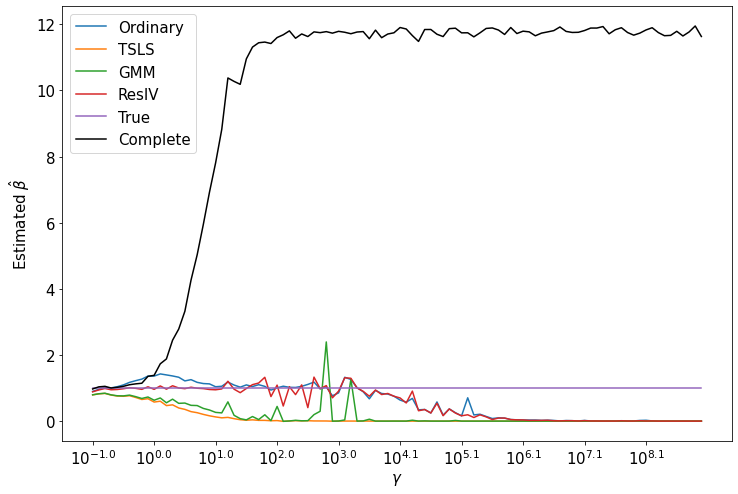

In [100]:
plt.figure(figsize=(12, 8))

plt.plot(k, lg_coef, label='Ordinary')
plt.plot(k, tslg_coef, label='TSLS')
# plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label='GMM')
plt.plot(k, res_coef, label='ResIV')
plt.plot(k, np.ones(100), label='True')
plt.plot(k, ref_coef, label='Complete', color='k')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$\gamma$', fontsize=15)
plt.ylabel(r'Estimated $\hat{\beta}$', fontsize=15)
plt.legend(fontsize=15)
plt.savefig("figures/Gamma_range.pdf", format='pdf')
    

In [78]:
expit(20)

0.9999999979388463

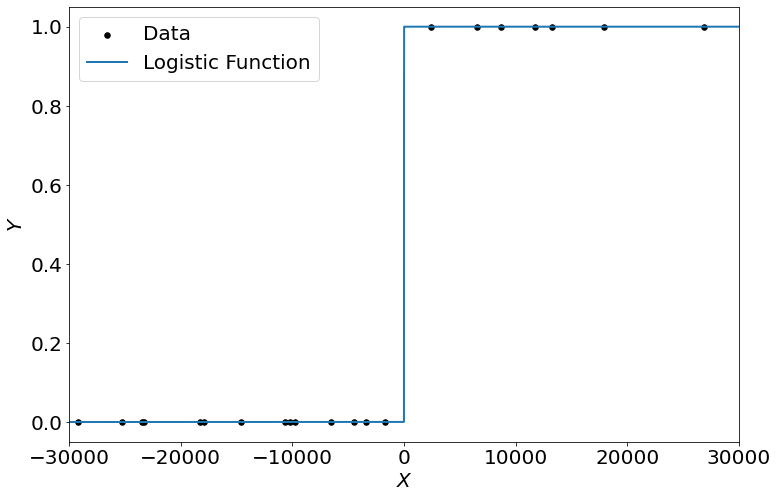

In [111]:
from scipy.special import expit

gamma = 10 ** 5
data = sim_data(100, gamma = gamma, sigma_e=0.1)
plt.figure(figsize=(12, 8))
plt.scatter(data.X, data.Y, c='k', s=30, label='Data')
x_neg = np.linspace(-10**5, -20, 50)
x_zero = np.linspace(-20, 20, 100)
x_pos = np.linspace(20, 10**5, 50)
x = np.concatenate((x_neg, x_zero, x_pos))
y = expit(x)
plt.plot(x, y, label='Logistic Function', linewidth=2)
plt.xlim(-30000, 30000)
plt.xlabel(r'$X$', fontsize=20)
plt.ylabel(r'$Y$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("figures/data_with_extreme_gamma.pdf", format='pdf')

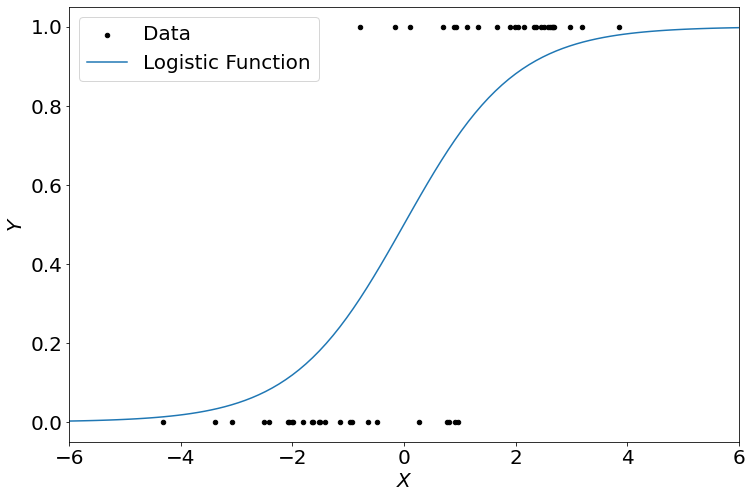

In [104]:
gamma = 2
data = sim_data(50, gamma = gamma, sigma_e=0.1)
plt.figure(figsize=(12, 8))
plt.scatter(data.X, data.Y, c='k', s=30, label='Data')
x = np.linspace(-6, 6, 100)
y = expit(x)
plt.plot(x, y, label='Logistic Function', linewidth=2)
plt.xlim(-6, 6)
plt.xlabel(r'$X$', fontsize=20)
plt.ylabel(r'$Y$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("figures/data_with_small_gamma.pdf", format='pdf')

## Beta

In [5]:

# Investigating beta

para_range = np.linspace(0, 10, 100)

for i in range(100):
    beta = para_range[i]
    
    data = sim_data(10000, beta = beta, sigma_e=0.1)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    



Text(0, 0.5, 'Estimated beta')

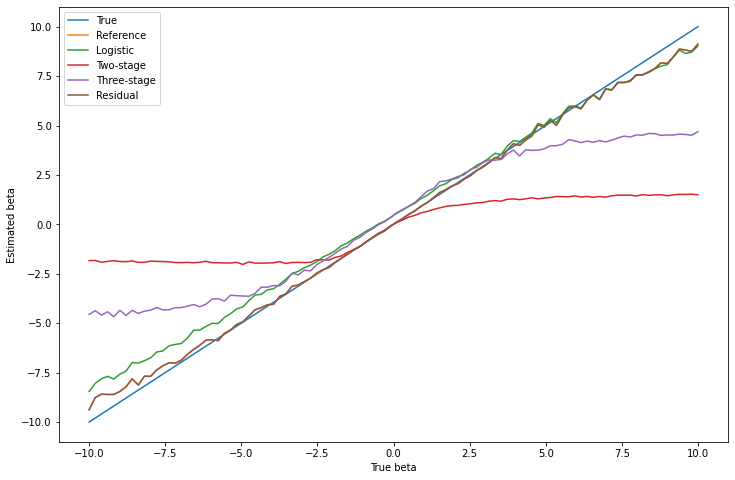

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(para_range, para_range, label = 'True')
plt.plot(para_range, ref_coef, label = 'Reference')
plt.plot(para_range, lg_coef, label = 'Logistic')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
plt.plot(para_range, thslg_coef, label = 'Three-stage')
#plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'Residual')
plt.legend()
plt.xlabel('True beta')
plt.ylabel('Estimated beta')

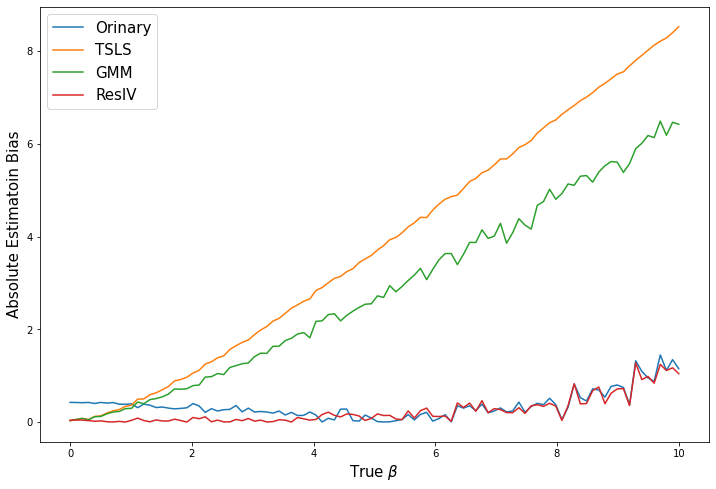

In [15]:
ref_dif = np.abs(para_range - ref_coef)
lg_dif = np.abs(para_range - lg_coef)
tslg_dif = np.abs(para_range - tslg_coef)
thslg_dif = np.abs(para_range - thslg_coef)
gmm_dif = np.abs(para_range - gmm_coef)
res_dif = np.abs(para_range - res_coef)

plt.figure(figsize=(12, 8))
# plt.plot(para_range, ref_dif, label = 'Reference')
plt.plot(para_range, lg_dif, label = 'Orinary')
plt.plot(para_range, tslg_dif, label = 'TSLS')
# plt.plot(para_range, thslg_dif, label = 'Three-stage')
plt.plot(para_range, gmm_dif, label = 'GMM')
plt.plot(para_range, res_dif, label = 'ResIV')
plt.legend(fontsize=15)
plt.xlabel(r'True $\beta$', fontsize=15)
plt.ylabel('Absolute Estimatoin Bias', fontsize=15)
plt.show()

## Eta

In [22]:
para_range = np.linspace(-10, 10, 100)
beta = 1

for i in range(100):
    eta = para_range[i]
    
    data = sim_data(n=10000, eta = eta, beta = 1)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    # thslg = three_stage_logit()
    # thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    # thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    

Text(0, 0.5, 'Estimated $\\hat{\\beta}$')

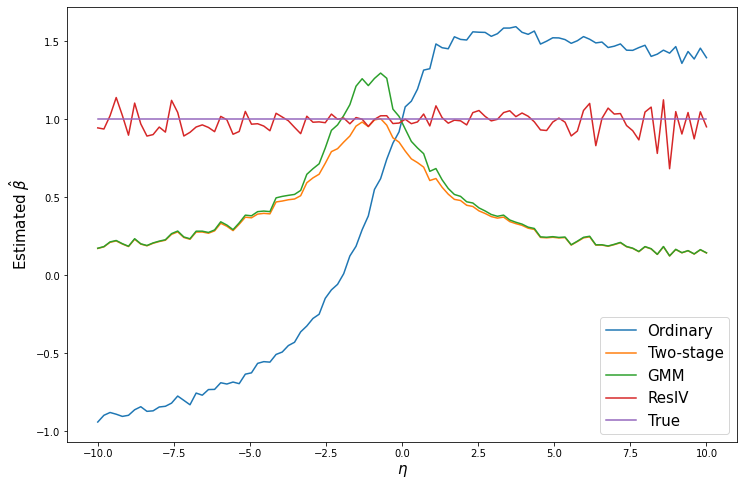

In [27]:
plt.figure(figsize=(12, 8))

# plt.plot(para_range, ref_coef, label = 'Reference')
plt.plot(para_range, lg_coef, label = 'Ordinary')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
# plt.plot(para_range, thslg_coef, label = 'Three-stage')
plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'ResIV')
plt.plot(para_range, np.ones(100), label = 'True')
plt.legend(fontsize=15)
plt.xlabel(r'$\eta$', fontsize=15)
plt.ylabel(r'Estimated $\hat{\beta}$', fontsize=15)

## Gamma

In [10]:
para_range = np.linspace(-10, 10, 100)
beta = 1

for i in range(100):
    gamma = para_range[i]
    
    data = sim_data(n=10000, gamma = gamma, beta = 1)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta

Text(0, 0.5, 'Estimated beta')

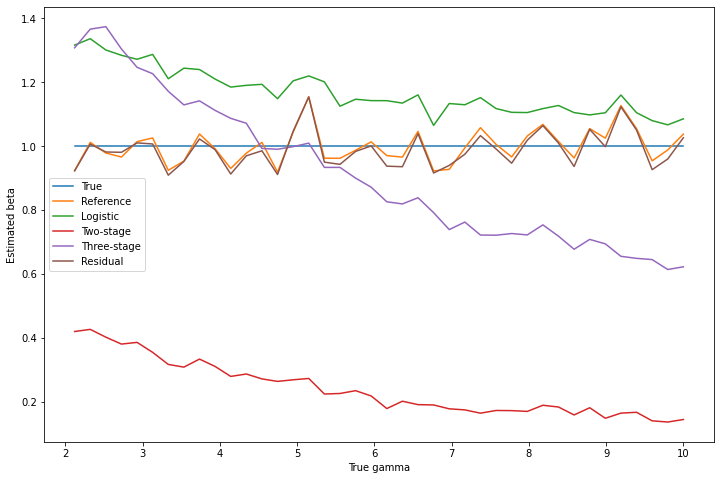

In [11]:
positive_range = para_range[para_range > 2]
plt.figure(figsize=(12, 8))
plt.plot(positive_range, beta * np.ones(len(positive_range)), label = 'True')
plt.plot(positive_range, ref_coef[para_range > 2], label = 'Reference')
plt.plot(positive_range, lg_coef[para_range > 2], label = 'Logistic')
plt.plot(positive_range, tslg_coef[para_range > 2], label = 'Two-stage')
plt.plot(positive_range, thslg_coef[para_range > 2], label = 'Three-stage')
#plt.plot(positive_range, gmm_coef[para_range > 2], label = 'GMM')
plt.plot(positive_range, res_coef[para_range > 2], label = 'Residual')
plt.legend()
plt.xlabel('True gamma')
plt.ylabel('Estimated beta')

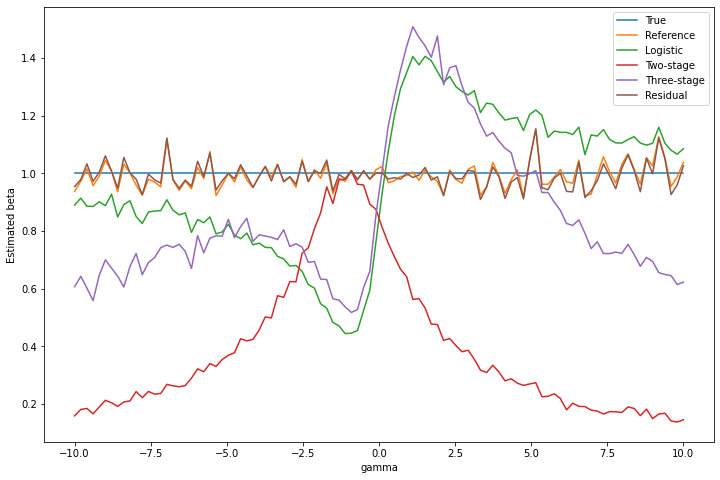

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(para_range, beta * np.ones(100), label = 'True')
plt.plot(para_range, ref_coef, label = 'Reference')
plt.plot(para_range, lg_coef, label = 'Logistic')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
plt.plot(para_range, thslg_coef, label = 'Three-stage')
#plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'Residual')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('Estimated beta')
plt.show()

## Alpha

In [13]:
para_range = np.linspace(-10, 10, 100)
beta = 1

for i in range(100):
    alpha = para_range[i]
    
    data = sim_data(n=10000, alpha = alpha, beta = beta)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]    
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    

Text(0, 0.5, 'Estimated beta')

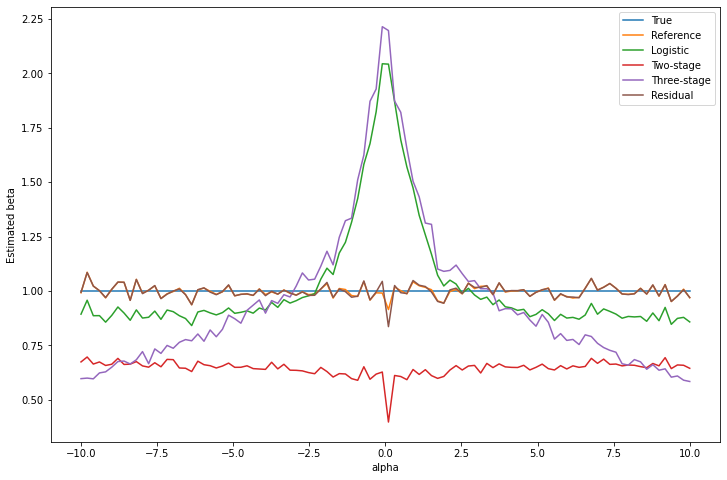

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(para_range, beta * np.ones(100), label = 'True')
plt.plot(para_range, ref_coef, label = 'Reference')
plt.plot(para_range, lg_coef, label = 'Logistic')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
plt.plot(para_range, thslg_coef, label = 'Three-stage')
#plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'Residual')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Estimated beta')

# Sensitivity to epsilon

In [19]:
k = np.linspace(-1, 4, 100)
para_range = np.power(10, k)
beta=1

for i in range(100):
    sigma_e = para_range[i]
    
    data = sim_data(n=10000, sigma_e = sigma_e, beta = beta)
    
    ref_lg = LogisticRegression()
    
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    

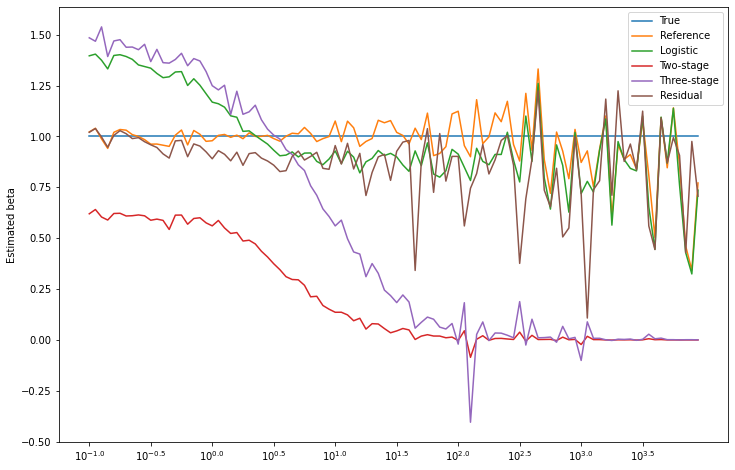

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(k, beta * np.ones(100), label = 'True')
plt.plot(k, ref_coef, label = 'Reference')
plt.plot(k, lg_coef, label = 'Logistic')
plt.plot(k, tslg_coef, label = 'Two-stage')
plt.plot(k, thslg_coef, label = 'Three-stage')
#plt.plot(k, gmm_coef, label = 'GMM')
plt.plot(k, res_coef, label = 'Residual')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.legend()
plt.ylabel('Estimated beta')
plt.show()

# Produce more tidy plots for the paper

In [64]:
# parameters to investigate: beta, eta, gamma, sigma_e
import pandas as pd
# Create a data frame for each method to store the results with column names being the parameter names
# and row names being the estimated coefficients
ordinary_coefs = pd.DataFrame(data = np.zeros((100, 4)), columns = ['beta', 'eta', 'gamma', 'sigma_e'])
tslg_coefs = pd.DataFrame(data = np.zeros((100, 4)), columns = ['beta', 'eta', 'gamma', 'sigma_e'])
gmm_coefs = pd.DataFrame(data = np.zeros((100, 4)), columns = ['beta', 'eta', 'gamma', 'sigma_e'])
ResIV_coefs = pd.DataFrame(data = np.zeros((100, 4)), columns = ['beta', 'eta', 'gamma', 'sigma_e'])

sigma_e = 0.1

# Beta
beta_range = np.linspace(0, 10, 100)

np.random.seed(123)

for i in range(100):
    beta = beta_range[i]
    
    data = sim_data(n=10000, beta = beta, sigma_e=sigma_e)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    ordinary_coefs.loc[i, 'beta'] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coefs.loc[i, 'beta'] = tslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coefs.loc[i, 'beta'] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    ResIV_coefs.loc[i, 'beta'] = res_model.beta

ordinary_dif = np.abs(beta_range - ordinary_coefs['beta'])
tslg_dif = np.abs(beta_range - tslg_coefs['beta'])
gmm_dif = np.abs(beta_range - gmm_coefs['beta'])
ResIV_dif = np.abs(beta_range - ResIV_coefs['beta'])

# Eta
eta_range = np.linspace(-10, 10, 100)

for i in range(100):
    eta = eta_range[i]
    
    data = sim_data(n=10000, eta = eta, beta = 1, sigma_e=sigma_e)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    ordinary_coefs.loc[i, 'eta'] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coefs.loc[i, 'eta'] = tslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coefs.loc[i, 'eta'] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    ResIV_coefs.loc[i, 'eta'] = res_model.beta

# Gamma
gamma_range = np.linspace(0, 10, 100)

for i in range(100):
    gamma = gamma_range[i]
    
    data = sim_data(n=10000, gamma = gamma, beta = 1, sigma_e=sigma_e)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    ordinary_coefs.loc[i, 'gamma'] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coefs.loc[i, 'gamma'] = tslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coefs.loc[i, 'gamma'] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    ResIV_coefs.loc[i, 'gamma'] = res_model.beta
    
# outliers = np.abs(gmm_coefs['gamma'] - beta) > 5
# gmm_coefs.loc[outliers, 'gamma'] = np.mean(gmm_coefs['gamma'][~outliers])
    
# Sigma_e
k = np.linspace(-1, 4, 100)
sigma_e_range = np.power(10, k)

for i in range(100):
    sigma_e = sigma_e_range[i]
    
    data = sim_data(n=10000, sigma_e = sigma_e, beta = 1)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    ordinary_coefs.loc[i, 'sigma_e'] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coefs.loc[i, 'sigma_e'] = tslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coefs.loc[i, 'sigma_e'] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    ResIV_coefs.loc[i, 'sigma_e'] = res_model.beta
    
outliers = np.abs(gmm_coefs['sigma_e'] - 1) > 5
gmm_coefs.loc[outliers, 'sigma_e'] = np.mean(gmm_coefs['sigma_e'][~outliers])


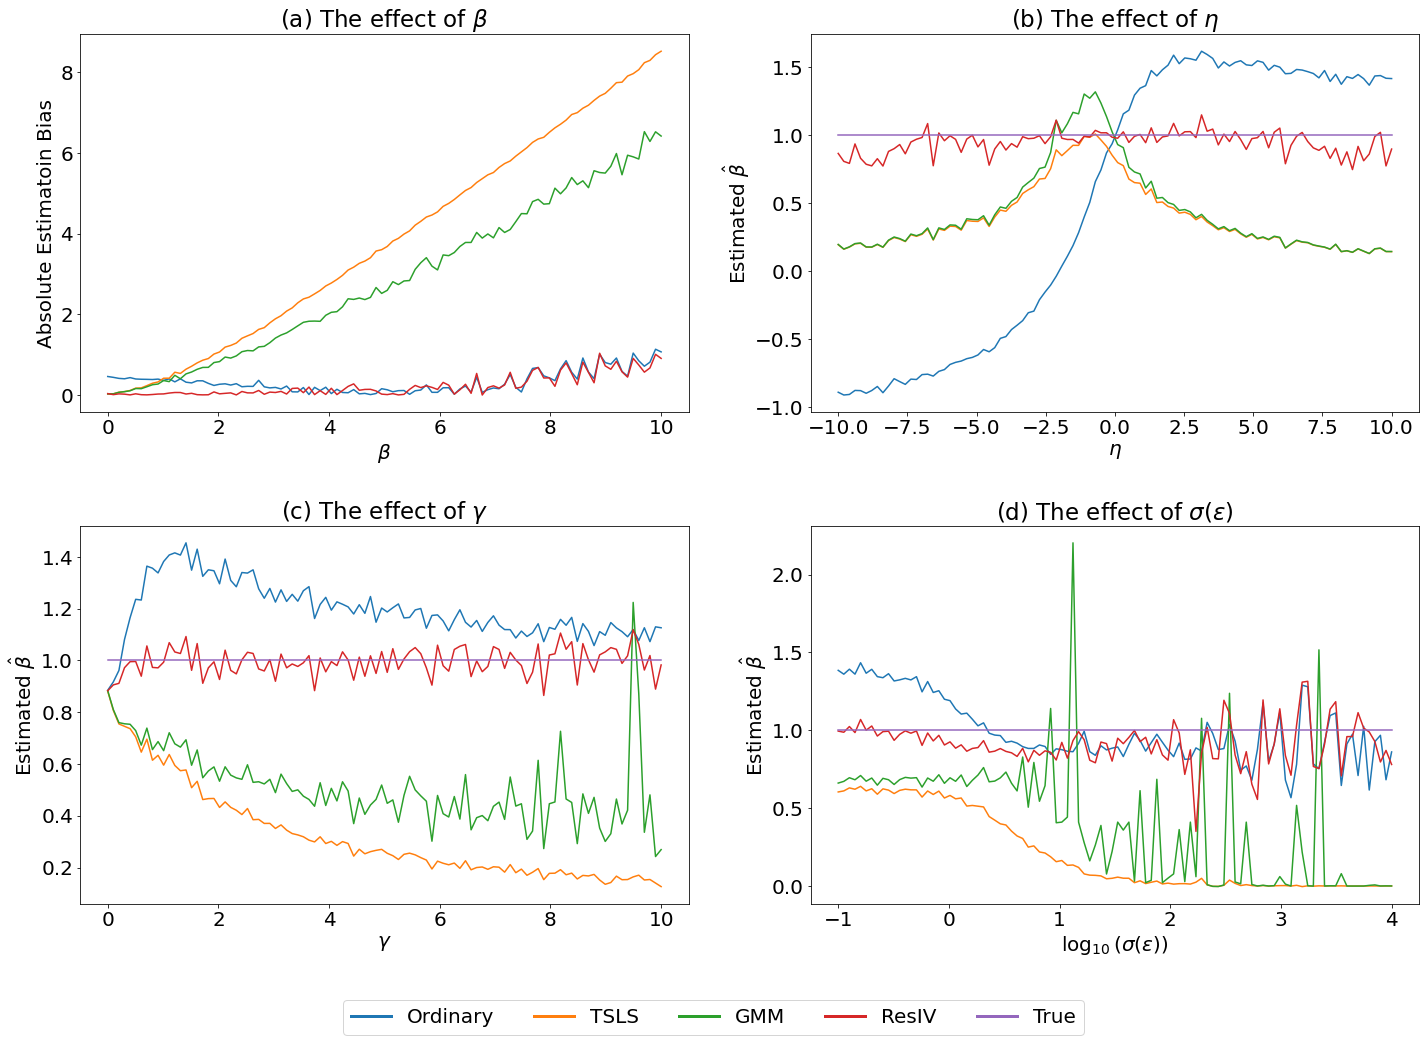

In [117]:
# Use a 2*2 subplot to show all the results
fig, axs = plt.subplots(2, 2, figsize=(24, 16))

plt.rc('xtick', labelsize=18)

axs[0, 0].plot(beta_range, ordinary_dif, label = 'Ordinary')
axs[0, 0].plot(beta_range, tslg_dif, label = 'TSLS')
axs[0, 0].plot(beta_range, gmm_dif, label = 'GMM')
axs[0, 0].plot(beta_range, ResIV_dif, label = 'ResIV')
axs[0, 0].set_xlabel(r'$\beta$', fontsize=20)
axs[0, 0].set_ylabel('Absolute Estimatoin Bias', fontsize=20)
# axs[0, 0].legend(fontsize=20)
axs[0, 0].set_title(r'(a) The effect of $\beta$', fontsize=23)

axs[0, 1].plot(eta_range, ordinary_coefs['eta'], label = 'Ordinary')
axs[0, 1].plot(eta_range, tslg_coefs['eta'], label = 'TSLS')
axs[0, 1].plot(eta_range, gmm_coefs['eta'], label = 'GMM')
axs[0, 1].plot(eta_range, ResIV_coefs['eta'], label = 'ResIV')
axs[0, 1].plot(eta_range, np.ones(100), label = 'True')
axs[0, 1].set_xlabel(r'$\eta$', fontsize=20)
axs[0, 1].set_ylabel(r'Estimated $\hat{\beta}$', fontsize=20)
# axs[0, 1].legend(fontsize=20)
axs[0, 1].set_title(r'(b) The effect of $\eta$', fontsize=23)

axs[1, 0].plot(gamma_range, ordinary_coefs['gamma'], label = 'Ordinary')
axs[1, 0].plot(gamma_range, tslg_coefs['gamma'], label = 'TSLS')
axs[1, 0].plot(gamma_range, gmm_coefs['gamma'], label = 'GMM')
axs[1, 0].plot(gamma_range, ResIV_coefs['gamma'], label = 'ResIV')
axs[1, 0].plot(gamma_range, np.ones(100), label = 'True')
axs[1, 0].set_xlabel(r'$\gamma$', fontsize=20)
axs[1, 0].set_ylabel(r'Estimated $\hat{\beta}$', fontsize=20)
# axs[1, 0].legend(fontsize=20)
axs[1, 0].set_title(r'(c) The effect of $\gamma$', fontsize=23)

axs[1, 1].plot(k, ordinary_coefs['sigma_e'], label = 'Ordinary')
axs[1, 1].plot(k, tslg_coefs['sigma_e'], label = 'TSLS')
axs[1, 1].plot(k, gmm_coefs['sigma_e'], label = 'GMM')
axs[1, 1].plot(k, ResIV_coefs['sigma_e'], label = 'ResIV')
axs[1, 1].plot(k, np.ones(100), label = 'True')
axs[1, 1].set_xlabel(r'$\log_{10}(\sigma(\epsilon))$', fontsize=20)
axs[1, 1].set_ylabel(r'Estimated $\hat{\beta}$', fontsize=20)
# axs[1, 1].legend(fontsize=20)
axs[1, 1].set_title(r'(d) The effect of $\sigma(\epsilon)$', fontsize=23)

handles, labels = axs[1, 1].get_legend_handles_labels()
leg = fig.legend(handles, labels, fontsize=20, loc = 'lower center', ncol = 5)

for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

fig.subplots_adjust(hspace=0.3)

plt.savefig('IV_estimation_bias.pdf', format='pdf', dpi=1000, bbox_inches='tight')

plt.show()